In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df.pivot_table(index='job_country',values='salary_year_avg', aggfunc='median')


,salary_year_avg
job_country,
Albania,69962.5
Algeria,44550.0
Argentina,96773.0
Armenia,76500.0
Australia,119250.0
...,...
Uruguay,57500.0
Uzbekistan,30750.0
Vietnam,79200.0


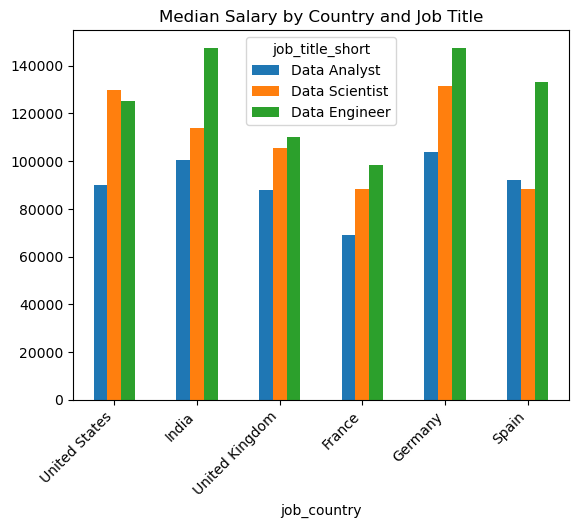

In [16]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    index='job_country',
    values='salary_year_avg',
    columns='job_title_short',
    aggfunc='median',
    
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_job_country_salary = df_job_country_salary[job_titles]

#visualisation

df_job_country_salary.plot(kind='bar')
plt.ylabel = ('Median Salary in $USD')
plt.xlabel = ("")
plt.title("Median Salary by Country and Job Title")
plt.xticks(rotation=45, ha='right')
plt.show()